In [14]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [15]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [16]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [17]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import netCDF4 as nc
import numpy as np
import scipy as sp
import datetime as dt
import netCDF4 as nc
import pickle
import cmocean as cm
import glob

%matplotlib inline

In [18]:
car_suffix = '_nitrate_means_perday_alg2.pkl'
car_suffix_sum = '_nitrate_sums_perday_alg2.pkl'

In [19]:


BR1 = 'BR_1st_2015'; BR2 = 'BR_2nd_2015'; LA1 = 'PI_1st_2015'; LA2 = 'PI_2nd_2015'; LA3 = 'PI_3rd_2015';
PI1 = 'PI_ACBC_2015'; PI2 = 'PI_ACBC_2015_2'; PI3 = 'PI_ACBC_2015_3'

LA3rr = 'LA3'
PI3rr = 'PI3'
PI3rr_old = 'PI3_old'

#var
BR1_var = pickle.load(open('./pickles/'+BR1+car_suffix , 'rb')) 
LA1_var = pickle.load(open('./pickles/'+LA1+car_suffix , 'rb'))
PI1_var = pickle.load(open('./pickles/'+PI1+car_suffix , 'rb'))
BR2_var = pickle.load(open('./pickles/'+BR2+car_suffix , 'rb')) 
LA2_var = pickle.load(open('./pickles/'+LA2+car_suffix , 'rb'))
PI2_var = pickle.load(open('./pickles/'+PI2+car_suffix , 'rb'))
LA3_var = pickle.load(open('./pickles/'+LA3+car_suffix , 'rb'))
PI3_var = pickle.load(open('./pickles/'+PI3+car_suffix , 'rb'))

BR1_var_sum = pickle.load(open('./pickles/'+BR1+car_suffix_sum , 'rb')) 
LA1_var_sum = pickle.load(open('./pickles/'+LA1+car_suffix_sum , 'rb'))
PI1_var_sum = pickle.load(open('./pickles/'+PI1+car_suffix_sum , 'rb'))
BR2_var_sum = pickle.load(open('./pickles/'+BR2+car_suffix_sum , 'rb')) 
LA2_var_sum = pickle.load(open('./pickles/'+LA2+car_suffix_sum , 'rb'))
PI2_var_sum = pickle.load(open('./pickles/'+PI2+car_suffix_sum , 'rb'))
LA3_var_sum = pickle.load(open('./pickles/'+LA3+car_suffix_sum , 'rb'))
PI3_var_sum = pickle.load(open('./pickles/'+PI3+car_suffix_sum , 'rb'))

PI3rr_var_sum = pickle.load(open('./pickles/'+PI3rr+car_suffix_sum , 'rb'))
PI3rr_old_var_sum = pickle.load(open('./pickles/'+PI3rr_old+car_suffix_sum , 'rb'))
LA3rr_var_sum = pickle.load(open('./pickles/'+LA3rr+car_suffix_sum , 'rb'))


mesh = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
bath = nc.Dataset('/data/tjarniko/MEOPAR/grid/bathymetry_201702.nc')

csize = pickle.load(open('./pickles/cellsize_alg2.pkl', 'rb'))


In [20]:
#plot metrics

lw = 2
fs = 15
tcm = cm.cm.deep
fact = 0.7
ymin_top = 0
ymax_top = 24
ymin_bottom = 24
ymax_bottom = 32
ymin = 0
ymax = 32

In [21]:
BR_var = np.zeros([40,365*3])
#always spunup - the br2 case repeated 3 times
BR_varsp = np.zeros([40,365*3])

LA_var = np.zeros([40,365*3])
PI_var = np.zeros([40,365*3])

#load into one array
BR_var[:,0:365] = BR1_var
LA_var[:,0:365] = LA1_var
PI_var[:,0:365] = PI1_var
BR_var[:,365:2*365] = BR2_var
LA_var[:,365:2*365] = LA2_var
PI_var[:,365:2*365] = PI2_var
BR_var[:,2*365:3*365] = np.nan
LA_var[:,2*365:3*365] = LA3_var
PI_var[:,2*365:3*365] = PI3_var

BR_varsp[:,0:365] = BR2_var
BR_varsp[:,365:2*365] = BR2_var
BR_varsp[:,2*365:3*365] = BR2_var

BR_var_sum = np.zeros([40,365*3])
#always spunup - the br2 case repeated 3 times
BR_var_sumsp = np.zeros([40,365*3])

LA_var_sum = np.zeros([40,365*3])
PI_var_sum = np.zeros([40,365*3])

#load into one array
BR_var_sum[:,0:365] = BR1_var_sum
LA_var_sum[:,0:365] = LA1_var_sum
PI_var_sum[:,0:365] = PI1_var_sum
BR_var_sum[:,365:2*365] = BR2_var_sum
LA_var_sum[:,365:2*365] = LA2_var_sum
PI_var_sum[:,365:2*365] = PI2_var_sum
BR_var_sum[:,2*365:3*365] = np.nan
LA_var_sum[:,2*365:3*365] = LA3_var_sum
PI_var_sum[:,2*365:3*365] = PI3_var_sum

BR_var_sumsp[:,0:365] = BR2_var_sum
BR_var_sumsp[:,365:2*365] = BR2_var_sum
BR_var_sumsp[:,2*365:3*365] = BR2_var_sum


# VARIABLE: NIT



# [A] Visualize by-layer means of this variable on one plot, for all 8 runs

In [22]:
cellsize_alldomain = np.nansum(np.nansum(csize,axis = 1),axis = 1)
csize_broad = np.zeros((40,365*3))
for i in range(0,365*3):
    csize_broad[:,i] = cellsize_alldomain

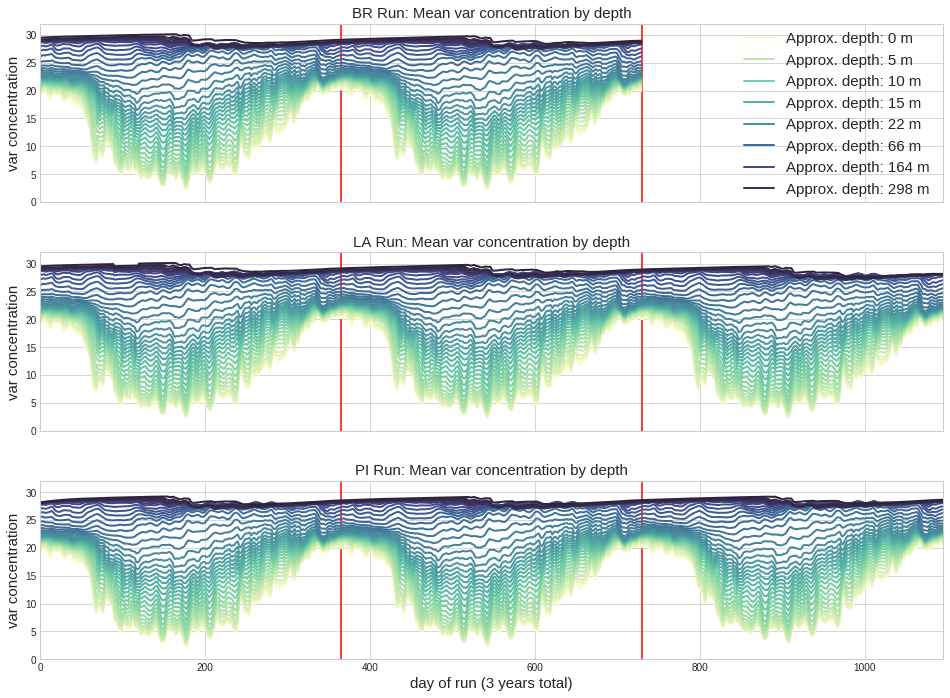

In [23]:
depth = mesh['e3t_0'][0,:,250,250]
fig = plt.figure(figsize=(19*fact,14*fact))
days_in = np.arange(0,365*3,1)

#BR
ax = fig.add_subplot(3,1,1)
plt.axvline(x=365,color='r')
plt.axvline(x=365*2,color='r')
for i in range(0,40):
    zdepth = np.sum(depth[0:i])
    if i%5 !=0: 
        ax.plot(days_in,BR_var[i,:],color = tcm(1.*i/40), linewidth = lw)
    if i%5 == 0:
            ax.plot(days_in,BR_var[i,:],color = tcm(1.*i/40),\
                    label = 'Approx. depth: '+str(int(zdepth))+' m', linewidth = lw)
plt.xlim([0,365*3])
plt.ylim([ymin,ymax])
ax.set_xticklabels([])
ax.set_ylabel('var concentration', fontsize = fs)
ax.legend(bbox_to_anchor=[1.0, 1.03, 0, 0], fontsize = fs)
plt.title('BR Run: Mean var concentration by depth', fontsize = fs )

#LA
ax = fig.add_subplot(3,1,2)
plt.axvline(x=365,color='r')
plt.axvline(x=365*2,color='r')
for i in range(0,40):
    zdepth = np.sum(depth[0:i])
    ax.plot(days_in,LA_var[i,:],color = tcm(1.*i/40), linewidth = lw)

plt.xlim([0,365*3])
plt.ylim([ymin,ymax])
ax.set_xticklabels([])
ax.set_ylabel('var concentration', fontsize = 15)
plt.title('LA Run: Mean var concentration by depth', fontsize = fs )

#PI
ax = fig.add_subplot(3,1,3)
plt.axvline(x=365,color='r')
plt.axvline(x=365*2,color='r')
for i in range(0,40):
    zdepth = np.sum(depth[0:i])
    ax.plot(days_in,PI_var[i,:],color = tcm(1.*i/40), linewidth = lw)

plt.xlim([0,365*3])
plt.ylim([ymin,ymax])
#ax.set_xticklabels([])
ax.set_ylabel('var concentration', fontsize = fs)
plt.title('PI Run: Mean var concentration by depth', fontsize = fs )
plt.xlabel('day of run (3 years total)', fontsize = fs)
plt.tight_layout()


In [24]:
grid = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
#get udir, vdir, wdir
vdir = grid['e2t'][0,:,:]
udir = grid['e1t'][0,:,:]
wdir = grid['e3t_0'][0,:,:,:]
tmask = grid['tmask'][0,:,:,:]

# w = np.array([[2,3],[2,3]])
# x = np.array([[2,4],[2,3]])
# print(w*x)
surfa = vdir*udir
surfa_broad = np.zeros([40,898,398])
for i in range(0,40):
    surfa_broad[i,:,:] = surfa

csize_recalc = surfa_broad*wdir*tmask
csize_recalc[:,878:898,:] = 0
csize_recalc[:,:,0:20] = 0
csize_recalc[csize_recalc==0] = np.nan
cellsize = csize_recalc

testd = nc.Dataset('/data/tjarniko/results/BASERUN_EXP/MAIN/\
BR_2nd_2015/ncs/SKOG_1d_20151127_20151231_carp_T_20151227-20151227.nc')
testdic =testd['dissolved_inorganic_carbon'][0,:,:,:]
w = np.where((testdic == 0)&~np.isnan(cellsize))

# [H] domain totals and subdomain totals for all 3 runs on one plot (BR3 = BR2)

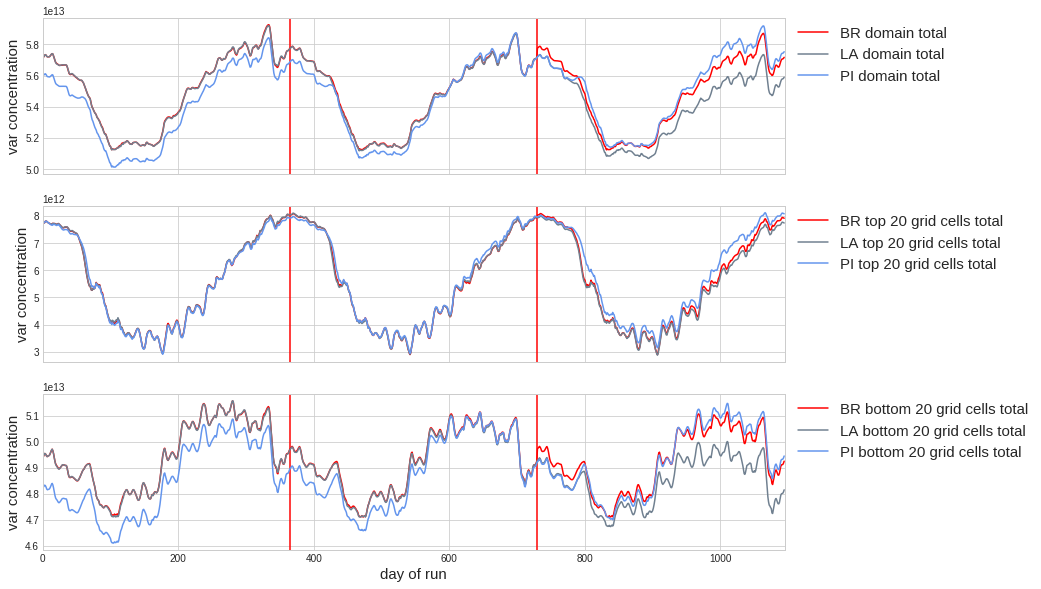

In [25]:
depth = mesh['e3t_0'][0,:,250,250]
fig = plt.figure(figsize=(19*fact,14*fact))
days_in = np.arange(0,365*3,1)

#BR
ax = fig.add_subplot(3,1,1)
plt.axvline(x=365,color='r')
# plt.axhline(y=0,color='r')
plt.axvline(x=365*2,color='r')
domsumBR = np.nansum(BR_var_sum[:,:],axis =0)
domsumBR[domsumBR < 10] = np.nan
domsumLA = np.nansum(LA_var_sum[:,:],axis =0)
domsumLA[domsumLA < 10] = np.nan
domsumPI = np.nansum(PI_var_sum[:,:],axis =0)
domsumPI[domsumPI < 10] = np.nan

domsumBR[365*2:365*3] = domsumBR[365*1:365*2]

ax.plot(days_in,domsumBR,color = 'red', label = 'BR domain total')
ax.plot(days_in,domsumLA,color = 'slategrey', label = 'LA domain total')
ax.plot(days_in,domsumPI,color = 'cornflowerblue', label = 'PI domain total')

ax.set_xticklabels([])
ax.set_ylabel('var concentration', fontsize = fs)
ax.legend(bbox_to_anchor=[1.0, 1.03, 0, 0], fontsize = fs)

plt.xlim([0,365*3])

ax = fig.add_subplot(3,1,2)
plt.axvline(x=365,color='r')
# plt.axhline(y=0,color='r')
plt.axvline(x=365*2,color='r')
domsumBR = np.nansum(BR_var_sum[0:20,:],axis =0)
domsumBR[domsumBR < 10] = np.nan
domsumLA = np.nansum(LA_var_sum[0:20,:],axis =0)
domsumLA[domsumLA < 10] = np.nan
domsumPI = np.nansum(PI_var_sum[0:20,:],axis =0)
domsumPI[domsumPI < 10] = np.nan
domsumBR[365*2:365*3] = domsumBR[365*1:365*2]

ax.plot(days_in,domsumBR,color = 'red', label = 'BR top 20 grid cells total')
ax.plot(days_in,domsumLA,color = 'slategrey', label = 'LA top 20 grid cells total')
ax.plot(days_in,domsumPI,color = 'cornflowerblue', label = 'PI top 20 grid cells total')

plt.xlim([0,365*3])

ax.set_xticklabels([])
ax.set_ylabel('var concentration', fontsize = fs)
ax.legend(bbox_to_anchor=[1.0, 1.03, 0, 0], fontsize = fs)

ax = fig.add_subplot(3,1,3)
plt.axvline(x=365,color='r')
# plt.axhline(y=0,color='r')
plt.axvline(x=365*2,color='r')
domsumBR = np.nansum(BR_var_sum[20:40,:],axis =0)
domsumBR[domsumBR < 10] = np.nan
domsumLA = np.nansum(LA_var_sum[20:40,:],axis =0)
domsumLA[domsumLA < 10] = np.nan
domsumPI = np.nansum(PI_var_sum[20:40,:],axis =0)
domsumPI[domsumPI < 10] = np.nan
domsumBR[365*2:365*3] = domsumBR[365*1:365*2]

ax.plot(days_in,domsumBR,color = 'red', label = 'BR bottom 20 grid cells total')
ax.plot(days_in,domsumLA,color = 'slategrey', label = 'LA bottom 20 grid cells total')
ax.plot(days_in,domsumPI,color = 'cornflowerblue', label = 'PI bottom 20 grid cells total')

plt.xlim([0,365*3])

#ax.set_xticklabels([])
ax.set_ylabel('var concentration', fontsize = fs)
ax.set_xlabel('day of run', fontsize = fs)
ax.legend(bbox_to_anchor=[1.0, 1.03, 0, 0], fontsize = fs)


# [H] b PI3 and LA3, with rerun

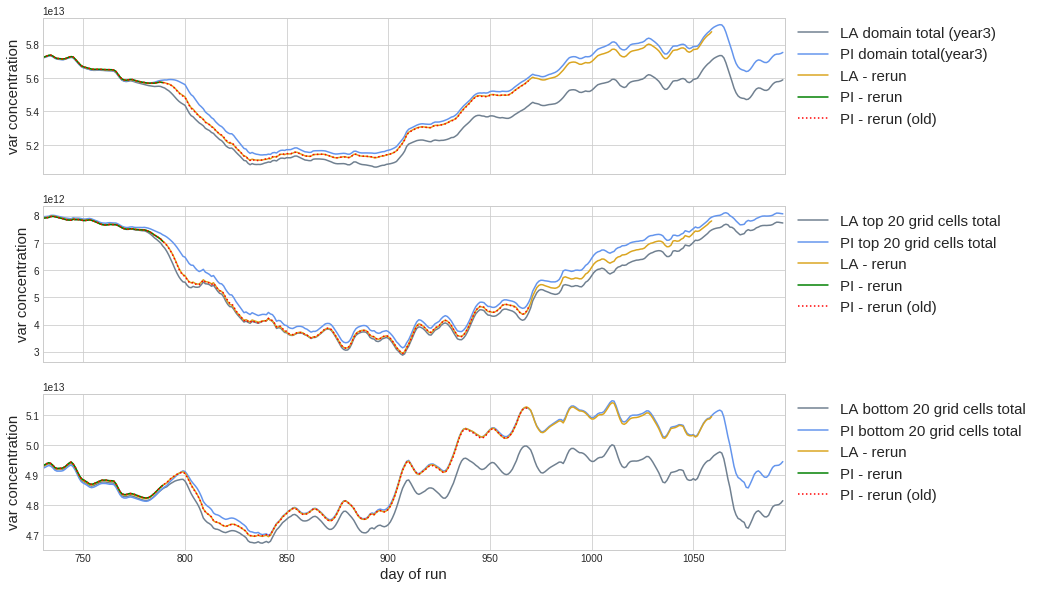

In [26]:
depth = mesh['e3t_0'][0,:,250,250]
fig = plt.figure(figsize=(19*fact,14*fact))
days_in = np.arange(0,365*3,1)

#BR
ax = fig.add_subplot(3,1,1)
#plt.axvline(x=365,color='r')
# plt.axhline(y=0,color='r')
#plt.axvline(x=365*2,color='r')
domsumBR = np.nansum(BR_var_sum[:,:],axis =0)
domsumBR[domsumBR < 10] = np.nan
domsumLA = np.nansum(LA_var_sum[:,:],axis =0)
domsumLA[domsumLA < 10] = np.nan
domsumPI = np.nansum(PI_var_sum[:,:],axis =0)
domsumPI[domsumPI < 10] = np.nan
domsumLA3rr = np.nansum(LA3rr_var_sum[:,:],axis =0)
domsumLA3rr[domsumLA3rr < 10] = np.nan
domsumPI3rr = np.nansum(PI3rr_var_sum[:,:],axis =0)
domsumPI3rr[domsumPI3rr < 10] = np.nan
domsumPI3rr_old = np.nansum(PI3rr_old_var_sum[:,:],axis =0)
domsumPI3rr_old[domsumPI3rr_old < 10] = np.nan


#ax.plot(days_in[365*2:365*3],domsumBR[365*2:365*3],color = 'red', label = 'BR domain total')
ax.plot(days_in[365*2:365*3],domsumLA[365*2:365*3],color = 'slategrey', label = 'LA domain total (year3)')
ax.plot(days_in[365*2:365*3],domsumPI[365*2:365*3],color = 'cornflowerblue', label = 'PI domain total(year3)')
ax.plot(days_in[365*2:365*3],domsumLA3rr, color = 'goldenrod', label = 'LA - rerun')
ax.plot(days_in[365*2:365*3],domsumPI3rr, color = 'green', label = 'PI - rerun')
ax.plot(days_in[365*2:365*3],domsumPI3rr_old, color = 'red', linestyle =  ':' ,label = 'PI - rerun (old)')

ax.set_xticklabels([])
ax.set_ylabel('var concentration', fontsize = fs)
ax.legend(bbox_to_anchor=[1.0, 1.03, 0, 0], fontsize = fs)

plt.xlim([365*2,365*3])

ax = fig.add_subplot(3,1,2)
#plt.axvline(x=365,color='r')
# plt.axhline(y=0,color='r')
#plt.axvline(x=365*2,color='r')
domsumBR = np.nansum(BR_var_sum[0:20,:],axis =0)
domsumBR[domsumBR < 10] = np.nan
domsumLA = np.nansum(LA_var_sum[0:20,:],axis =0)
domsumLA[domsumLA < 10] = np.nan
domsumPI = np.nansum(PI_var_sum[0:20,:],axis =0)
domsumPI[domsumPI < 10] = np.nan
domsumLA3rr = np.nansum(LA3rr_var_sum[0:20,:],axis =0)
domsumLA3rr[domsumLA3rr < 10] = np.nan
domsumPI3rr = np.nansum(PI3rr_var_sum[0:20,:],axis =0)
domsumPI3rr[domsumPI3rr < 10] = np.nan
domsumPI3rr_old = np.nansum(PI3rr_old_var_sum[0:20,:],axis =0)
domsumPI3rr_old[domsumPI3rr_old < 10] = np.nan

#ax.plot(days_in[365*2:365*3],domsumBR[365*2:365*3],color = 'red', label = 'BR top 20 grid cells total')
ax.plot(days_in[365*2:365*3],domsumLA[365*2:365*3],color = 'slategrey', label = 'LA top 20 grid cells total')
ax.plot(days_in[365*2:365*3],domsumPI[365*2:365*3],color = 'cornflowerblue', label = 'PI top 20 grid cells total')
ax.plot(days_in[365*2:365*3],domsumLA3rr, color = 'goldenrod', label = 'LA - rerun')
ax.plot(days_in[365*2:365*3],domsumPI3rr, color = 'green', label = 'PI - rerun')
ax.plot(days_in[365*2:365*3],domsumPI3rr_old, color = 'red', linestyle = ':' ,label = 'PI - rerun (old)')


plt.xlim([365*2,365*3])

ax.set_xticklabels([])
ax.set_ylabel('var concentration', fontsize = fs)
ax.legend(bbox_to_anchor=[1.0, 1.03, 0, 0], fontsize = fs)

ax = fig.add_subplot(3,1,3)
#plt.axvline(x=365,color='r')
# plt.axhline(y=0,color='r')
#plt.axvline(x=365*2,color='r')
domsumBR = np.nansum(BR_var_sum[20:40,:],axis =0)
domsumBR[domsumBR < 10] = np.nan
domsumLA = np.nansum(LA_var_sum[20:40,:],axis =0)
domsumLA[domsumLA < 10] = np.nan
domsumPI = np.nansum(PI_var_sum[20:40,:],axis =0)
domsumPI[domsumPI < 10] = np.nan
domsumLA3rr = np.nansum(LA3rr_var_sum[20:40,:],axis =0)
domsumLA3rr[domsumLA3rr < 10] = np.nan
domsumPI3rr = np.nansum(PI3rr_var_sum[20:40,:],axis =0)
domsumPI3rr[domsumPI3rr < 10] = np.nan
domsumPI3rr_old = np.nansum(PI3rr_old_var_sum[20:40,:],axis =0)
domsumPI3rr_old[domsumPI3rr_old < 10] = np.nan

#ax.plot(days_in[365*2:365*3],domsumBR[365*2:365*3],color = 'red', label = 'BR bottom 20 grid cells total')
ax.plot(days_in[365*2:365*3],domsumLA[365*2:365*3],color = 'slategrey', label = 'LA bottom 20 grid cells total')
ax.plot(days_in[365*2:365*3],domsumPI[365*2:365*3],color = 'cornflowerblue', label = 'PI bottom 20 grid cells total')
ax.plot(days_in[365*2:365*3],domsumLA3rr, color = 'goldenrod', label = 'LA - rerun')
ax.plot(days_in[365*2:365*3],domsumPI3rr, color = 'green', label = 'PI - rerun')
ax.plot(days_in[365*2:365*3],domsumPI3rr_old, color = 'red', linestyle = ':' ,label = 'PI - rerun (old)')


plt.xlim([365*2,365*3])

#ax.set_xticklabels([])
ax.set_ylabel('var concentration', fontsize = fs)
ax.set_xlabel('day of run', fontsize = fs)
ax.legend(bbox_to_anchor=[1.0, 1.03, 0, 0], fontsize = fs)
